In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.vector_ar.var_model import VAR
%matplotlib inline

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(58098, 3)

In [5]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [6]:
ratings.shape

(27753444, 4)

## Reformating movies data

In [3]:
movies_cleaned = pd.DataFrame(movies.genres.str.split("|").tolist(), index=movies.movieId)
movies_cleaned.head()

,0,1,2,3,4,5,6,7,8,9
movieId,,,,,,,,,,
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Children,Fantasy,None,None,None,None,None,None,None
3,Comedy,Romance,None,None,None,None,None,None,None,None
4,Comedy,Drama,Romance,None,None,None,None,None,None,None
5,Comedy,None,None,None,None,None,None,None,None,None


In [4]:
movies_cleaned2 = movies_cleaned.stack().reset_index()
movies_cleaned2.head(10)

,movieId,level_1,0
0,1,0,Adventure
1,1,1,Animation
2,1,2,Children
3,1,3,Comedy
4,1,4,Fantasy
5,2,0,Adventure
6,2,1,Children
7,2,2,Fantasy
8,3,0,Comedy
9,3,1,Romance


In [5]:
movies_genres = movies_cleaned2.drop("level_1", axis=1).rename(columns={0:"genres"})
movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [6]:
movies = pd.merge(movies.drop("genres",axis=1), movies_genres)
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy
5,2,Jumanji (1995),Adventure
6,2,Jumanji (1995),Children
7,2,Jumanji (1995),Fantasy
8,3,Grumpier Old Men (1995),Comedy
9,3,Grumpier Old Men (1995),Romance


In [7]:
movies.shape

(106107, 3)

## Reformating ratings data

In [8]:
import time

In [9]:
ratings["rating_date"] = ratings["timestamp"].apply(lambda x: time.strftime('%Y-%m', time.localtime(x)))
ratings["rating_year"] = ratings["timestamp"].apply(lambda x:  time.strftime('%Y', time.localtime(x)))

In [10]:
ratings.head(50)

,userId,movieId,rating,timestamp,rating_date,rating_year
0,1,307,3.5,1256677221,2009-10,2009
1,1,481,3.5,1256677456,2009-10,2009
2,1,1091,1.5,1256677471,2009-10,2009
3,1,1257,4.5,1256677460,2009-10,2009
4,1,1449,4.5,1256677264,2009-10,2009
5,1,1590,2.5,1256677236,2009-10,2009
6,1,1591,1.5,1256677475,2009-10,2009
7,1,2134,4.5,1256677464,2009-10,2009
8,1,2478,4.0,1256677239,2009-10,2009
9,1,2840,3.0,1256677500,2009-10,2009


In [11]:
movie_ratings = ratings.merge(movies.drop("title", axis=1), on="movieId", how="inner")

In [12]:
movie_ratings[movie_ratings.movieId==1]  # ratings of the movie with Id=1

,userId,movieId,rating,timestamp,rating_date,rating_year,genres
896082,4,1,4.0,1113765937,2005-04,2005,Adventure
896083,4,1,4.0,1113765937,2005-04,2005,Animation
896084,4,1,4.0,1113765937,2005-04,2005,Children
896085,4,1,4.0,1113765937,2005-04,2005,Comedy
896086,4,1,4.0,1113765937,2005-04,2005,Fantasy
896087,10,1,5.0,948885850,2000-01,2000,Adventure
896088,10,1,5.0,948885850,2000-01,2000,Animation
896089,10,1,5.0,948885850,2000-01,2000,Children
896090,10,1,5.0,948885850,2000-01,2000,Comedy
896091,10,1,5.0,948885850,2000-01,2000,Fantasy


In [39]:
movie_ratings.groupby(["genres"],as_index=False)["movieId"].count().sort_values(by="movieId", ascending=False)

,genres,movieId
8,Drama,12191048
5,Comedy,9999184
1,Action,8214956
17,Thriller,7489628
2,Adventure,6452309
15,Romance,5078478
16,Sci-Fi,4740208
6,Crime,4631581
9,Fantasy,3118549
4,Children,2381124


In [31]:
genres_list=["Drama", "Comedy", "Action", "Thriller", "Adventure", "Romance",
            "Sci-Fi", "Crime", "Fantasy"]

In [32]:
movie_ratings = movie_ratings.loc[movie_ratings["genres"].isin(genres_list)]

In [33]:
movie_ratings.tail(10)

,userId,movieId,rating,timestamp,rating_date,rating_year,genres
75198259,282374,166318,4.0,1479758063,2016-11,2016,Romance
75198260,282374,168674,1.5,1486168497,2017-02,2017,Action
75198261,282374,168680,3.0,1486168702,2017-02,2017,Comedy
75198262,282374,168680,3.0,1486168702,2017-02,2017,Drama
75198263,282374,168684,3.5,1486168812,2017-02,2017,Adventure
75198265,282374,168686,3.0,1486168872,2017-02,2017,Drama
75198267,282374,168688,4.0,1486168898,2017-02,2017,Comedy
75198268,282374,168694,4.0,1486169129,2017-02,2017,Comedy
75198271,282403,167894,1.0,1524243885,2018-04,2018,Action
75198272,282732,161572,3.5,1504408070,2017-09,2017,Drama


## Create time series of mean ratings vs. year and year-month

In [43]:
mean_ratings_year = movie_ratings.groupby(["rating_year", "genres"], as_index=False)["rating"].agg(np.mean)

,rating_year,genres,rating
0,1995,Comedy,3.0
1,1995,Crime,3.0
2,1995,Drama,4.0
3,1995,Fantasy,4.0
4,1995,Romance,4.0


In [44]:
mean_ratings_year.head(18)

,rating_year,genres,rating
0,1995,Comedy,3.000000
1,1995,Crime,3.000000
2,1995,Drama,4.000000
3,1995,Fantasy,4.000000
4,1995,Romance,4.000000
5,1995,Thriller,4.000000
6,1996,Action,3.443604
7,1996,Adventure,3.497114
8,1996,Comedy,3.425812
9,1996,Crime,3.629884


In [45]:
mean_ratings_year.shape

(213, 3)

In [46]:
mean_ratings_yearmonth = movie_ratings.groupby(["rating_date", "genres"], as_index=False)["rating"].agg(np.mean)

In [48]:
mean_ratings_yearmonth.rating_date.unique()  # 1997-09 to 2018-09 looks fine

array(['1995-01', '1996-01', '1996-02', '1996-03', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11',
       '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05',
       '1997-06', '1997-07', '1997-09', '1997-10', '1997-11', '1997-12',
       '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06',
       '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12',
       '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06',
       '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12',
       '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
       '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', 

In [51]:
pd.to_datetime(mean_ratings_yearmonth["rating_date"], format="%Y-%m")

0      1995-01-01
1      1995-01-01
2      1995-01-01
3      1995-01-01
4      1995-01-01
5      1995-01-01
6      1996-01-01
7      1996-01-01
8      1996-01-01
9      1996-01-01
10     1996-01-01
11     1996-01-01
12     1996-01-01
13     1996-01-01
14     1996-01-01
15     1996-02-01
16     1996-02-01
17     1996-02-01
18     1996-02-01
19     1996-02-01
20     1996-02-01
21     1996-02-01
22     1996-02-01
23     1996-02-01
24     1996-03-01
25     1996-03-01
26     1996-03-01
27     1996-03-01
28     1996-03-01
29     1996-03-01
          ...    
2424   2018-06-01
2425   2018-06-01
2426   2018-06-01
2427   2018-07-01
2428   2018-07-01
2429   2018-07-01
2430   2018-07-01
2431   2018-07-01
2432   2018-07-01
2433   2018-07-01
2434   2018-07-01
2435   2018-07-01
2436   2018-08-01
2437   2018-08-01
2438   2018-08-01
2439   2018-08-01
2440   2018-08-01
2441   2018-08-01
2442   2018-08-01
2443   2018-08-01
2444   2018-08-01
2445   2018-09-01
2446   2018-09-01
2447   2018-09-01
2448   201

In [53]:
## Only keep data between 1997 and 2018, and 1997-09 to 2018-09
mean_ratings_year = mean_ratings_year[mean_ratings_year["rating_year"]>"1996"]
mean_ratings_yearmonth = mean_ratings_yearmonth[mean_ratings_yearmonth["rating_date"]>='1997-09']

In [55]:
mean_ratings_yearmonth

,rating_date,genres,rating
177,1997-09,Action,3.497851
178,1997-09,Adventure,3.614968
179,1997-09,Comedy,3.547915
180,1997-09,Crime,3.722609
181,1997-09,Drama,3.706409
182,1997-09,Fantasy,3.587582
183,1997-09,Romance,3.645617
184,1997-09,Sci-Fi,3.594025
185,1997-09,Thriller,3.519164
186,1997-10,Action,3.505801


In [57]:
# do similar things on standard deviation
std_ratings_year = movie_ratings.groupby(["rating_year", "genres"], as_index=False)["rating"].agg(np.std, ddof=1)
std_ratings_year = std_ratings_year[std_ratings_year["rating_year"]>"1996"]
std_ratings_yearmonth = movie_ratings.groupby(["rating_date", "genres"], as_index=False)["rating"].agg(np.std, ddof=1)
std_ratings_yearmonth = std_ratings_yearmonth[std_ratings_yearmonth["rating_date"]>="1997-09"]

In [60]:
std_ratings_year.rename(columns={"rating":"rating_std"}, inplace=True)
std_ratings_yearmonth.rename(columns={"rating":"rating_std"}, inplace=True)

## Store processed time series data to csv

In [63]:
mean_ratings_year.to_csv("./processed_data/mean_ratings_year.csv", header=True)
mean_ratings_yearmonth.to_csv("./processed_data/mean_ratings_yearmonth.csv", header=True)
std_ratings_year.to_csv("./processed_data/std_ratings_year.csv", header=True)
std_ratings_yearmonth.to_csv("./processed_data/std_ratings_yearmonth.csv", header=True)

In [79]:
## read data
mean_ratings_year = pd.read_csv("./processed_data/mean_ratings_year.csv", index_col=0)
mean_ratings_yearmonth = pd.read_csv("./processed_data/mean_ratings_yearmonth.csv", index_col=0)
std_ratings_year = pd.read_csv("./processed_data/std_ratings_year.csv", index_col=0)
std_ratings_year = pd.read_csv("./processed_data/std_ratings_yearmonth.csv", index_col=0)

## EDA

In [80]:
mean_ratings_year = pd.pivot_table(mean_ratings_year, values='rating', index=['rating_year'], columns=['genres'])
mean_ratings_year

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_year,,,,,,,,,
1997,3.548525,3.613980,3.495033,3.730365,3.723624,3.564130,3.623943,3.626507,3.530168
1998,3.449360,3.513609,3.444061,3.637904,3.681496,3.444800,3.637055,3.440529,3.461829
1999,3.456230,3.521396,3.548891,3.760173,3.761720,3.540008,3.691495,3.447996,3.555144
2000,3.478141,3.555149,3.505346,3.724306,3.731078,3.505363,3.638275,3.452382,3.513800
2001,3.466287,3.538901,3.452050,3.695761,3.690312,3.501080,3.589955,3.409064,3.493300
2002,3.402068,3.496604,3.390198,3.652576,3.643979,3.496089,3.535497,3.388271,3.466833
2003,3.359482,3.479238,3.390235,3.607162,3.620900,3.504180,3.508837,3.351178,3.433568
2004,3.323862,3.419152,3.335580,3.557621,3.587004,3.457905,3.441248,3.300873,3.390562
2005,3.323825,3.405254,3.327510,3.583837,3.595053,3.438771,3.422432,3.302825,3.399659


In [90]:
mean_ratings_year.corr()

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
genres,,,,,,,,,
Action,1.000000,0.938348,0.738907,0.927277,0.844652,0.856183,0.598774,0.968314,0.952664
Adventure,0.938348,1.000000,0.843704,0.865885,0.890492,0.887435,0.734348,0.910684,0.872797
Comedy,0.738907,0.843704,1.000000,0.825526,0.971719,0.742580,0.949700,0.672922,0.735786
Crime,0.927277,0.865885,0.825526,1.000000,0.913659,0.845309,0.680846,0.868166,0.953339
Drama,0.844652,0.890492,0.971719,0.913659,1.000000,0.791496,0.890137,0.785433,0.851071
Fantasy,0.856183,0.887435,0.742580,0.845309,0.791496,1.000000,0.568263,0.831855,0.890495
Romance,0.598774,0.734348,0.949700,0.680846,0.890137,0.568263,1.000000,0.516436,0.564596
Sci-Fi,0.968314,0.910684,0.672922,0.868166,0.785433,0.831855,0.516436,1.000000,0.913595
Thriller,0.952664,0.872797,0.735786,0.953339,0.851071,0.890495,0.564596,0.913595,1.000000


In [81]:
mean_ratings_yearmonth = pd.pivot_table(mean_ratings_yearmonth, values='rating', index=['rating_date'], columns=['genres'])
mean_ratings_yearmonth

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_date,,,,,,,,,
1997-09,3.497851,3.614968,3.547915,3.722609,3.706409,3.587582,3.645617,3.594025,3.519164
1997-10,3.505801,3.590452,3.468590,3.695402,3.665669,3.527335,3.598263,3.597502,3.497024
1997-11,3.411883,3.529372,3.466164,3.669048,3.664561,3.543101,3.590192,3.513699,3.437533
1997-12,3.424951,3.537306,3.461299,3.664982,3.640967,3.507917,3.553970,3.518480,3.425153
1998-01,3.369930,3.474170,3.345554,3.540208,3.507089,3.402778,3.496704,3.455460,3.376575
1998-02,3.357514,3.438235,3.326405,3.564177,3.533341,3.362241,3.482628,3.409192,3.370228
1998-03,3.402358,3.532372,3.442641,3.626349,3.688915,3.465441,3.652230,3.499450,3.432021
1998-04,3.426793,3.566129,3.465083,3.672682,3.679584,3.532730,3.646277,3.471719,3.472904
1998-05,3.320755,3.443912,3.486557,3.648716,3.650956,3.425308,3.684980,3.418219,3.409234


In [91]:
mean_ratings_yearmonth.corr()

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
genres,,,,,,,,,
Action,1.000000,0.923204,0.729434,0.882610,0.814628,0.784651,0.596072,0.938310,0.952381
Adventure,0.923204,1.000000,0.830091,0.835145,0.842614,0.864805,0.721450,0.875236,0.876558
Comedy,0.729434,0.830091,1.000000,0.779892,0.897575,0.722371,0.926935,0.655691,0.748910
Crime,0.882610,0.835145,0.779892,1.000000,0.888357,0.796705,0.649897,0.824027,0.928210
Drama,0.814628,0.842614,0.897575,0.888357,1.000000,0.758573,0.844848,0.721262,0.855821
Fantasy,0.784651,0.864805,0.722371,0.796705,0.758573,1.000000,0.566995,0.739813,0.817106
Romance,0.596072,0.721450,0.926935,0.649897,0.844848,0.566995,1.000000,0.513609,0.602561
Sci-Fi,0.938310,0.875236,0.655691,0.824027,0.721262,0.739813,0.513609,1.000000,0.902010
Thriller,0.952381,0.876558,0.748910,0.928210,0.855821,0.817106,0.602561,0.902010,1.000000


In [67]:
std_ratings_year = pd.pivot_table(std_ratings_year, values='rating_std', index=['rating_year'], columns=['genres'])
std_ratings_year

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_year,,,,,,,,,
1997,0.991613,0.986052,1.026341,1.006027,0.978439,0.999549,0.980139,1.027747,0.980717
1998,1.133555,1.114580,1.142351,1.098438,1.080172,1.140301,1.086116,1.157638,1.119975
1999,1.152192,1.140374,1.127373,1.084896,1.061780,1.133625,1.081156,1.164124,1.118220
2000,1.138157,1.118413,1.131405,1.082488,1.059834,1.142221,1.082141,1.156197,1.108970
2001,1.131396,1.114951,1.127569,1.072367,1.060848,1.132867,1.087148,1.150686,1.103629
2002,1.125330,1.115939,1.127651,1.073221,1.056151,1.137522,1.091127,1.141546,1.094946
2003,1.085659,1.072834,1.080409,1.011525,0.998215,1.092613,1.042634,1.102371,1.047839
2004,1.057050,1.051818,1.056194,0.987601,0.964640,1.065470,1.022980,1.075672,1.012150
2005,1.062905,1.053993,1.059537,0.986384,0.964872,1.069447,1.030425,1.080603,1.020510


In [68]:
std_ratings_yearmonth = pd.pivot_table(std_ratings_yearmonth, values='rating_std', index=['rating_date'], columns=['genres'])
std_ratings_yearmonth

genres,Action,Adventure,Comedy,Crime,Drama,Fantasy,Romance,Sci-Fi,Thriller
rating_date,,,,,,,,,
1997-09,1.106538,1.092228,1.090593,1.064400,1.069022,1.075551,1.072771,1.105557,1.090471
1997-10,1.079621,1.072075,1.105809,1.042518,1.047145,1.098481,1.063437,1.074285,1.064050
1997-11,1.110505,1.105470,1.132242,1.097050,1.072954,1.120343,1.088941,1.131036,1.098396
1997-12,1.118911,1.102524,1.128847,1.098946,1.077308,1.116165,1.089283,1.153341,1.119209
1998-01,1.125609,1.118400,1.165350,1.130655,1.134554,1.129559,1.124248,1.153509,1.115195
1998-02,1.140692,1.137107,1.163709,1.130277,1.115039,1.203879,1.137214,1.168365,1.124234
1998-03,1.124581,1.099226,1.145219,1.105604,1.079239,1.171270,1.081570,1.133379,1.118575
1998-04,1.149184,1.138473,1.174478,1.103944,1.117697,1.193905,1.131556,1.169020,1.132944
1998-05,1.180462,1.130976,1.163081,1.114928,1.073599,1.151450,1.072137,1.143248,1.123223


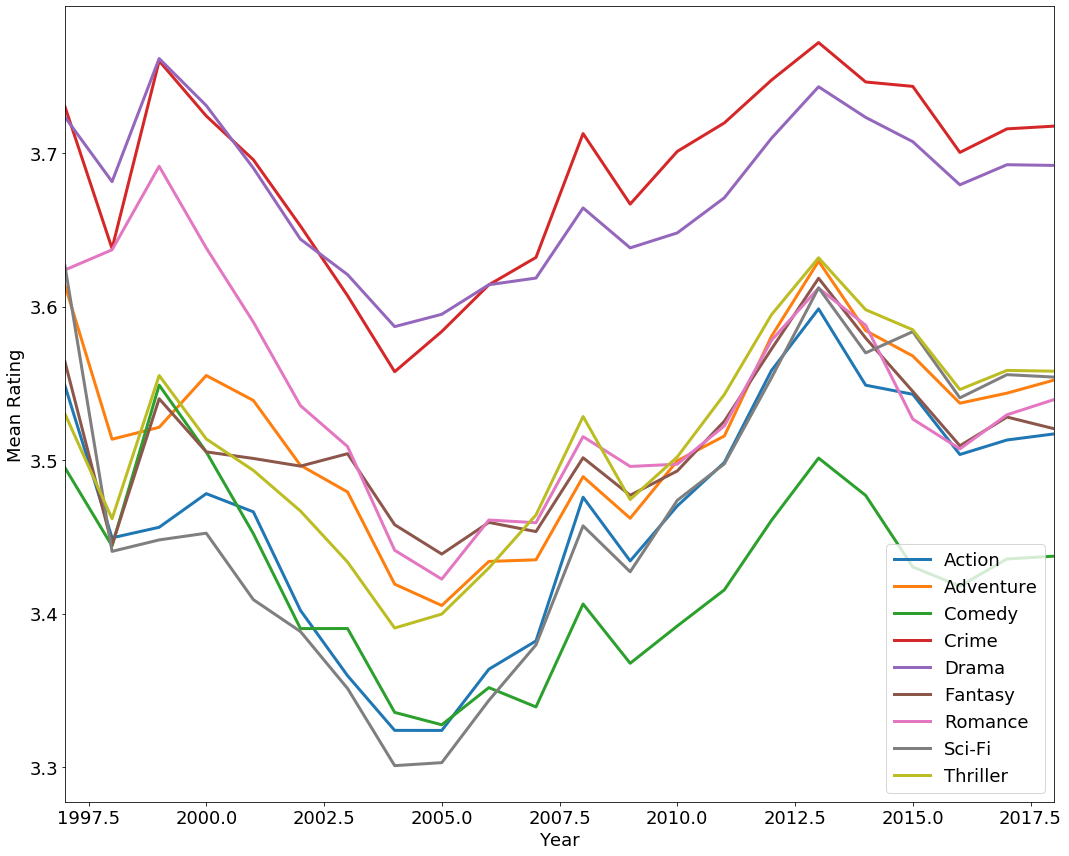

In [82]:
ax = mean_ratings_year.plot(kind="line", lw=3, figsize=(15,12), fontsize=18)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Mean Rating", fontsize=18)
ax.legend(fontsize=18)

plt.tight_layout()
plt.savefig("Temporal_Yearly.pdf")

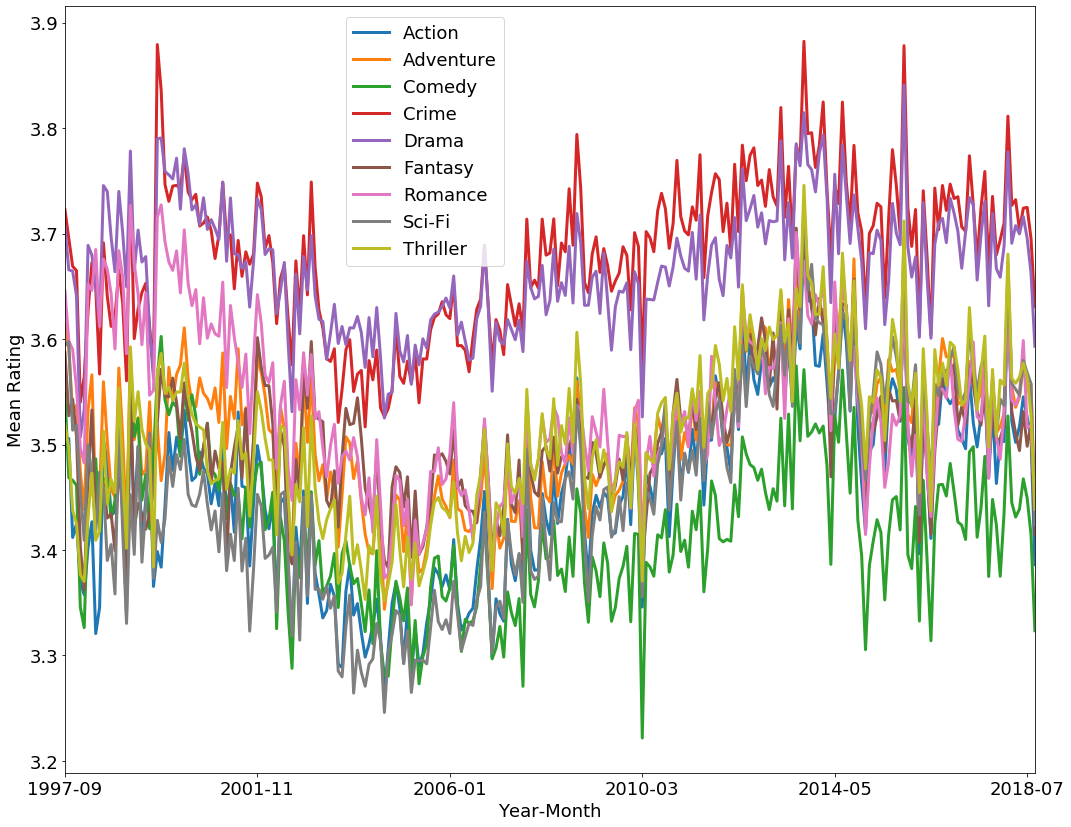

In [89]:
ax = mean_ratings_yearmonth.plot(kind="line", lw=3, figsize=(15,12), fontsize=18)
ax.set_xlabel("Year-Month", fontsize=18)
ax.set_ylabel("Mean Rating", fontsize=18)
ax.legend(bbox_to_anchor=(0.28,0.65), fontsize=18)

plt.tight_layout()
plt.savefig("Temporal_Monthly.pdf")

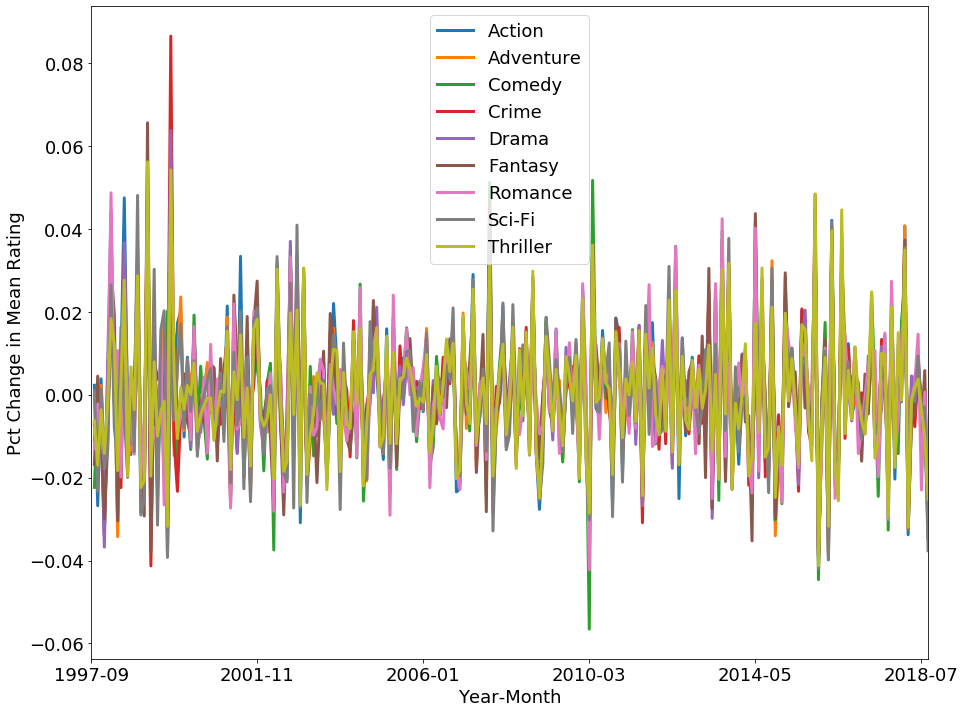

In [82]:
ax = mean_ratings_yearmonth.pct_change().plot(kind="line", lw=3, figsize=(15,12), fontsize=18)
ax.set_xlabel("Year-Month", fontsize=18)
ax.set_ylabel("Pct Change in Mean Rating", fontsize=18)
ax.legend(fontsize=18)

### Visualizing recent five years  (each dot being a movie)

In [55]:
ratings_YearGenreMovieId = movie_ratings.groupby(["movieId", "rating_year", "genres"], as_index=False).agg(np.mean)

In [56]:
ratings_YearGenreMovieId.head()  # here the average is taken wrt users, for each movie in a given genre and year

,movieId,rating_year,genres,userId,rating,timestamp
0,1,1996,Adventure,142122.867644,4.119812,8.404510e+08
1,1,1996,Comedy,142122.867644,4.119812,8.404510e+08
2,1,1996,Fantasy,142122.867644,4.119812,8.404510e+08
3,1,1997,Adventure,139563.453197,3.868780,8.614428e+08
4,1,1997,Comedy,139563.453197,3.868780,8.614428e+08


In [57]:
ratings_13to17 = ratings_YearGenreMovieId.loc[ratings_YearGenreMovieId.rating_year.isin(['2013','2014','2015','2016','2017'])]

In [58]:
ratings_13to17.head()

,movieId,rating_year,genres,userId,rating,timestamp
51,1,2013,Adventure,148034.100612,3.951444,1.371758e+09
52,1,2013,Comedy,148034.100612,3.951444,1.371758e+09
53,1,2013,Fantasy,148034.100612,3.951444,1.371758e+09
54,1,2014,Adventure,135291.418322,3.960265,1.404724e+09
55,1,2014,Comedy,135291.418322,3.960265,1.404724e+09


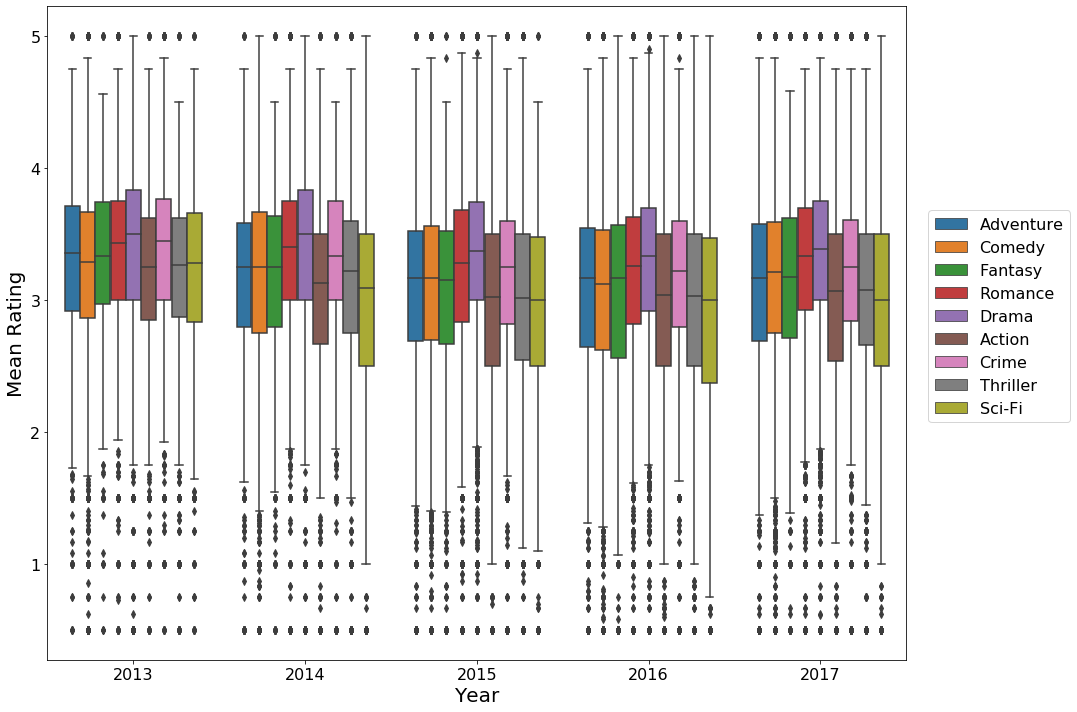

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(x="rating_year", y="rating", hue="genres", data=ratings_13to17)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Mean Rating", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.2,0.7), fontsize=16)

plt.tight_layout()
plt.savefig("YearlyPlot.pdf")

### Visualizing each month in 2017 (each dot being a movie)

In [49]:
ratings_MonthGenreMovieId = movie_ratings.groupby(["movieId", "rating_date", "genres"], as_index=False).agg(np.mean)

In [50]:
ratings_MonthGenreMovieId.head()  # here the average is taken wrt users, for each movie in a given genre and year-month

,movieId,rating_date,genres,userId,rating,timestamp
0,1,1996-01,Adventure,212699.000000,4.000000,8.229166e+08
1,1,1996-01,Comedy,212699.000000,4.000000,8.229166e+08
2,1,1996-01,Fantasy,212699.000000,4.000000,8.229166e+08
3,1,1996-02,Adventure,143793.058824,4.529412,8.244260e+08
4,1,1996-02,Comedy,143793.058824,4.529412,8.244260e+08


In [51]:
ratings_2017 = ratings_MonthGenreMovieId.loc[ratings_MonthGenreMovieId.rating_date.isin(['2017-01',
                                                                                         '2017-02','2017-03',
                                                                                         '2017-04','2017-05',
                                                                                        '2017-06','2017-07',
                                                                                        '2017-08','2017-09',
                                                                                        '2017-10','2017-11',
                                                                                        '2017-12'])]

In [61]:
ratings_2017["Month"] = ratings_2017["rating_date"].apply(lambda x: x[-2:])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


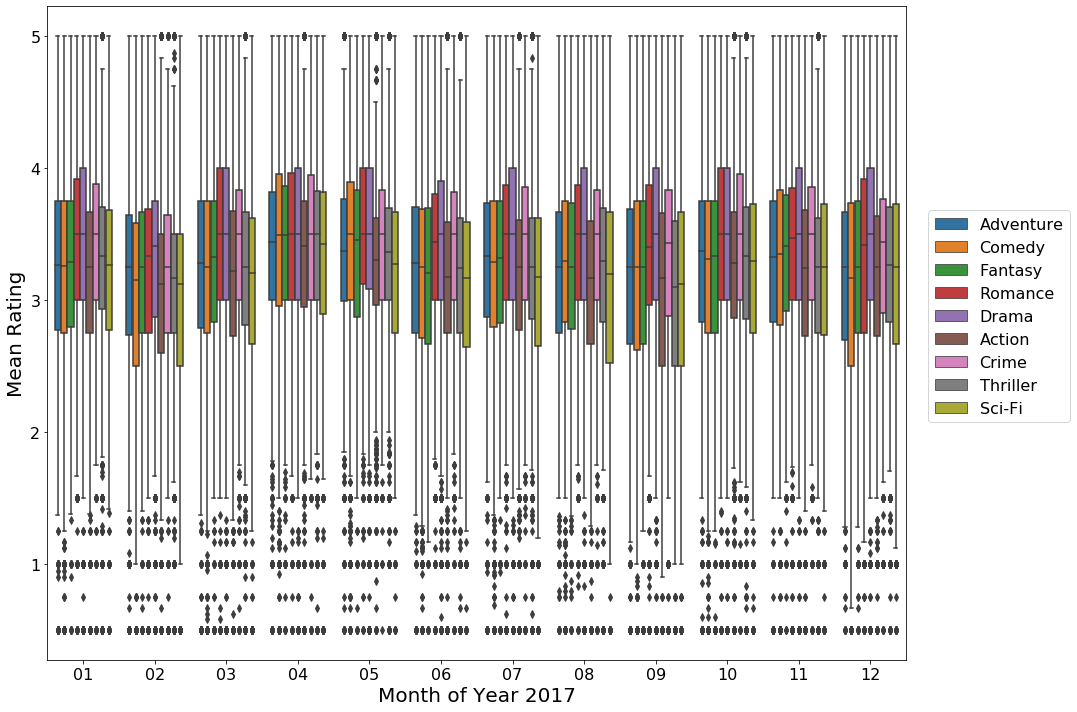

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Month', y="rating", hue="genres", data=ratings_2017)
plt.xlabel("Month of Year 2017", fontsize=20)
plt.ylabel("Mean Rating", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.2,0.7), fontsize=16)

plt.tight_layout()
plt.savefig("MonthlyPlot.pdf")

### Visualizing recent five years  (each dot being a consumer)

In [68]:
ratings_YearGenreUserId = movie_ratings.groupby(["userId", "rating_year", "genres"], as_index=False).agg(np.mean)

In [73]:
ratings_YearGenreUserId.head(20)

,userId,rating_year,genres,movieId,rating,timestamp
0,1,2009,Action,2823.750000,2.875000,1.256677e+09
1,1,2009,Adventure,1591.000000,1.500000,1.256677e+09
2,1,2009,Comedy,2050.333333,3.750000,1.256677e+09
3,1,2009,Crime,3439.500000,3.000000,1.256677e+09
4,1,2009,Drama,2327.500000,3.666667,1.256677e+09
5,1,2009,Fantasy,2134.000000,4.500000,1.256677e+09
6,1,2009,Romance,2575.000000,4.000000,1.256677e+09
7,1,2009,Sci-Fi,2637.500000,2.750000,1.256677e+09
8,1,2009,Thriller,2458.142857,2.642857,1.256677e+09
9,2,2007,Action,509.500000,3.500000,1.192914e+09


In [71]:
ratings_13to17_users = ratings_YearGenreUserId.loc[ratings_YearGenreUserId.rating_year.isin(['2013','2014','2015','2016','2017'])]

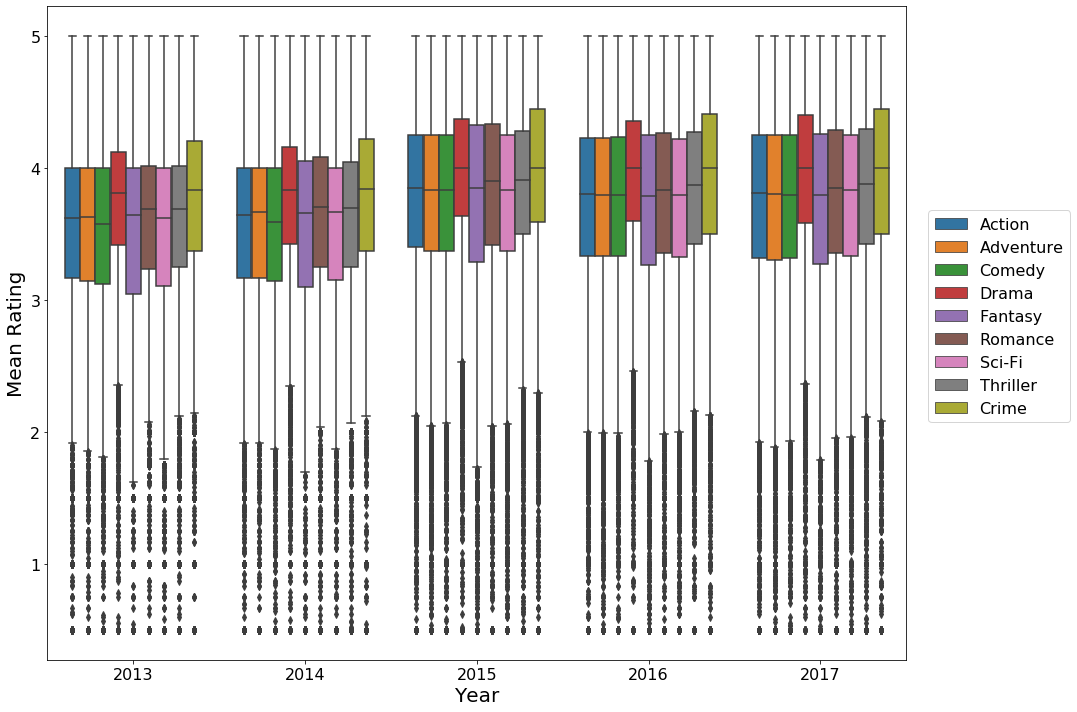

In [72]:
plt.figure(figsize=(15,10))
sns.boxplot(x="rating_year", y="rating", hue="genres", data=ratings_13to17_users)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Mean Rating", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.2,0.7), fontsize=16)

plt.tight_layout()
plt.savefig("YearlyPlot_Users.pdf")

### Visualizing each month in 2017 (each dot being a consumer)

In [74]:
ratings_MonthGenreUserId = movie_ratings.groupby(["userId", "rating_date", "genres"], as_index=False).agg(np.mean)

In [75]:
ratings_MonthGenreUserId.head(20)

,userId,rating_date,genres,movieId,rating,timestamp
0,1,2009-10,Action,2823.750000,2.875000,1.256677e+09
1,1,2009-10,Adventure,1591.000000,1.500000,1.256677e+09
2,1,2009-10,Comedy,2050.333333,3.750000,1.256677e+09
3,1,2009-10,Crime,3439.500000,3.000000,1.256677e+09
4,1,2009-10,Drama,2327.500000,3.666667,1.256677e+09
5,1,2009-10,Fantasy,2134.000000,4.500000,1.256677e+09
6,1,2009-10,Romance,2575.000000,4.000000,1.256677e+09
7,1,2009-10,Sci-Fi,2637.500000,2.750000,1.256677e+09
8,1,2009-10,Thriller,2458.142857,2.642857,1.256677e+09
9,2,2007-10,Action,509.500000,3.500000,1.192914e+09


In [76]:
ratings_2017_users = ratings_MonthGenreUserId.loc[ratings_MonthGenreUserId.rating_date.isin(['2017-01',
                                                                                         '2017-02','2017-03',
                                                                                         '2017-04','2017-05',
                                                                                        '2017-06','2017-07',
                                                                                        '2017-08','2017-09',
                                                                                        '2017-10','2017-11',
                                                                                        '2017-12'])]

In [77]:
ratings_2017_users["Month"] = ratings_2017_users["rating_date"].apply(lambda x: x[-2:])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


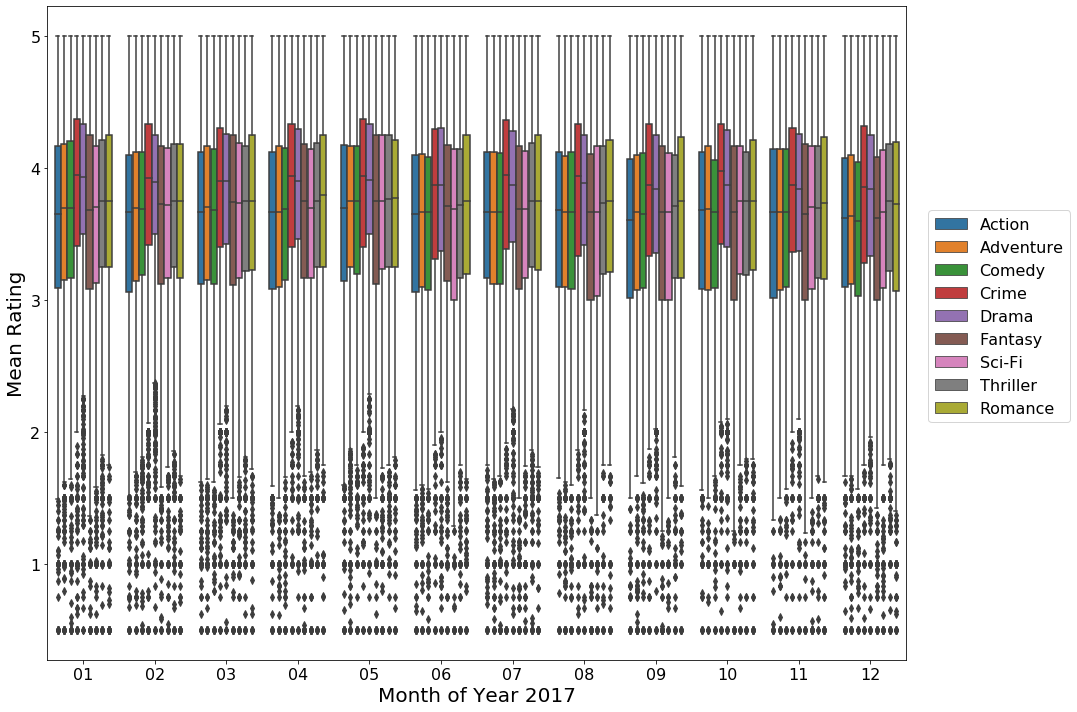

In [78]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Month', y="rating", hue="genres", data=ratings_2017_users)
plt.xlabel("Month of Year 2017", fontsize=20)
plt.ylabel("Mean Rating", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.2,0.7), fontsize=16)

plt.tight_layout()
plt.savefig("MonthlyPlot_Users.pdf")

## VAR modeling

### Without de-trending

In [7]:
# Temporal resolution: year
model = VAR(mean_ratings_year[["Drama", "Action", "Comedy", "Thriller"]]).fit(maxlags=1)
model.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Sep, 2020
Time:                     14:38:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.7042
Nobs:                     21.0000    HQIC:                  -31.4831
Log likelihood:           233.648    FPE:                1.77623e-14
AIC:                     -31.6990    Det(Omega_mle):     7.55935e-15
--------------------------------------------------------------------
Results for equation Drama
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.553985         1.099227            0.504           0.614
L1.Drama            1.330052         1.212677            1.097           0.273
L1.Action           0.180642         0.315400            0.573      

In [8]:
# Temporal resolution: month
model = VAR(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]]).fit(maxlags=1)
model.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Sep, 2020
Time:                     14:39:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.1699
Nobs:                     252.000    HQIC:                  -28.3373
Log likelihood:           2174.41    FPE:                4.40901e-13
AIC:                     -28.4500    Det(Omega_mle):     4.07578e-13
--------------------------------------------------------------------
Results for equation Drama
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               1.708758         0.194049            8.806           0.000
L1.Drama            0.155968         0.145356            1.073           0.283
L1.Action           0.141832         0.112516            1.261      

### De-trending

In [10]:
## Detrending
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller

In [12]:
print(adfuller(mean_ratings_year[["Drama"]]))  # Stationary
print(adfuller(mean_ratings_year[["Action"]]))  # Unstationary
print(adfuller(mean_ratings_year[["Comedy"]]))  # Stationary
print(adfuller(mean_ratings_year[["Thriller"]])) # Stationary

(-10.96035877405361, 8.356428815531135e-20, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -100.89476880707704)
(-1.3197587431843456, 0.6200848870891525, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -44.97347936742901)
(-3.703220535348564, 0.004068081799419482, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -92.19414982406752)
(-4.253418288447936, 0.0005343630361669577, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -67.41205315283426)


In [13]:
print(adfuller(detrend(mean_ratings_year["Action"], order=1, axis=0)))

(-3.133823012375228, 0.024149299254310936, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -61.44795927706495)


In [14]:
mean_ratings_year["Action"] = detrend(mean_ratings_year["Action"], order=1, axis=0)

In [16]:
# Temporal resolution: year
model = VAR(mean_ratings_year[["Drama", "Action", "Comedy", "Thriller"]]).fit(maxlags=1)
model.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Sep, 2020
Time:                     14:47:08
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.4059
Nobs:                     21.0000    HQIC:                  -31.1847
Log likelihood:           230.516    FPE:                2.39365e-14
AIC:                     -31.4006    Det(Omega_mle):     1.01869e-14
--------------------------------------------------------------------
Results for equation Drama
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.850365         1.552959            0.548           0.584
L1.Drama            1.336973         1.225258            1.091           0.275
L1.Action           0.108577         0.255902            0.424      

In [17]:
print(adfuller(mean_ratings_yearmonth[["Drama"]]))  # Untationary
print(adfuller(mean_ratings_yearmonth[["Action"]]))  # Unstationary
print(adfuller(mean_ratings_yearmonth[["Comedy"]]))  # Unstationary
print(adfuller(mean_ratings_yearmonth[["Thriller"]])) # Unstationary

(-2.5192708700044175, 0.11085564164987549, 6, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, -815.4149788696141)
(-2.041667897362184, 0.2686071473961835, 4, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -758.1158847818616)
(-2.3375670886757467, 0.16013785694468086, 5, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, -764.5044921088003)
(-2.2148100909802073, 0.20091422522214586, 4, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -780.3415591878493)


In [19]:
print(adfuller(detrend(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]], order=2, axis=0)["Drama"]))
print(adfuller(detrend(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]], order=2, axis=0)["Action"]))
print(adfuller(detrend(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]], order=2, axis=0)["Comedy"]))
print(adfuller(detrend(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]], order=2, axis=0)["Thriller"]))

(-3.5410838073425492, 0.006992577078734866, 4, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -815.8468732338315)
(-2.3997519114108776, 0.14180644210162685, 4, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -758.7395124841274)
(-3.454306258475826, 0.009241144302746352, 3, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, -765.8672396667131)
(-2.5029673745925543, 0.11475399891475246, 4, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, -780.7900915779874)


In [20]:
# Temporal resolution: month
model = VAR(detrend(mean_ratings_yearmonth[["Drama", "Action", "Comedy", "Thriller"]], order=1, axis=0)).fit(maxlags=1, ic='aic')
model.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Sep, 2020
Time:                     14:50:40
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -28.4106
Nobs:                     252.000    HQIC:                  -28.5780
Log likelihood:           2204.74    FPE:                3.46559e-13
AIC:                     -28.6907    Det(Omega_mle):     3.20367e-13
--------------------------------------------------------------------
Results for equation Drama
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000469         0.002931           -0.160           0.873
L1.Drama            0.172492         0.145700            1.184           0.236
L1.Action           0.123117         0.113418            1.086      